# Task 2: Predicting customer buying behaviour
## 1. Data cleaning

## Import libraries

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [164]:
df = pd.read_csv("customer_booking.csv",encoding='ISO-8859-1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [165]:
df["trip_type"].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

Overview of the data features:

- `num_passengers`: number of passengers for the flight
- `sales_channel`: either from Internet website or phone app
- `trip_type`: Round trip, one-way trip or circle trip
- `purchase_lead`: how many days in advance the booking would take place before the flight
- `length_of_stay`: duration of stay at the destination
- `flight_hour`: what time of the day the flight would take place
- `flight_day`: day of the week the flight would take place
- `route`: flight route indicating origin and destination of the trip
- `booking_origin`: country of origin the booking is taking place from
- `wants_extra_`: a binary 0 or 1 variable with 1 indicating if the booking requires that extra service (baggage, preferred seat or in-flight meals)
- `flight_duration`: duration of the flight, in hours
- `booking_complete`: target variable indicating if the booking was completed or not

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

First conclusions:

- There are no features names that should be changed
- Data types are correct
- There are no nulls

#### Let's remove the duplicates (if any)

In [167]:
df.drop_duplicates(inplace=True)
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


## Separate categorical from numerical data

In [168]:
cat = df.select_dtypes(exclude = 'number').copy()
num = df.select_dtypes(include='number').copy()

### Categorical outliers

Let's see what categorical variables may present outliers

In [169]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sales_channel   49281 non-null  object
 1   trip_type       49281 non-null  object
 2   flight_day      49281 non-null  object
 3   route           49281 non-null  object
 4   booking_origin  49281 non-null  object
dtypes: object(5)
memory usage: 2.3+ MB


In [170]:
cat["route"].value_counts()

AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

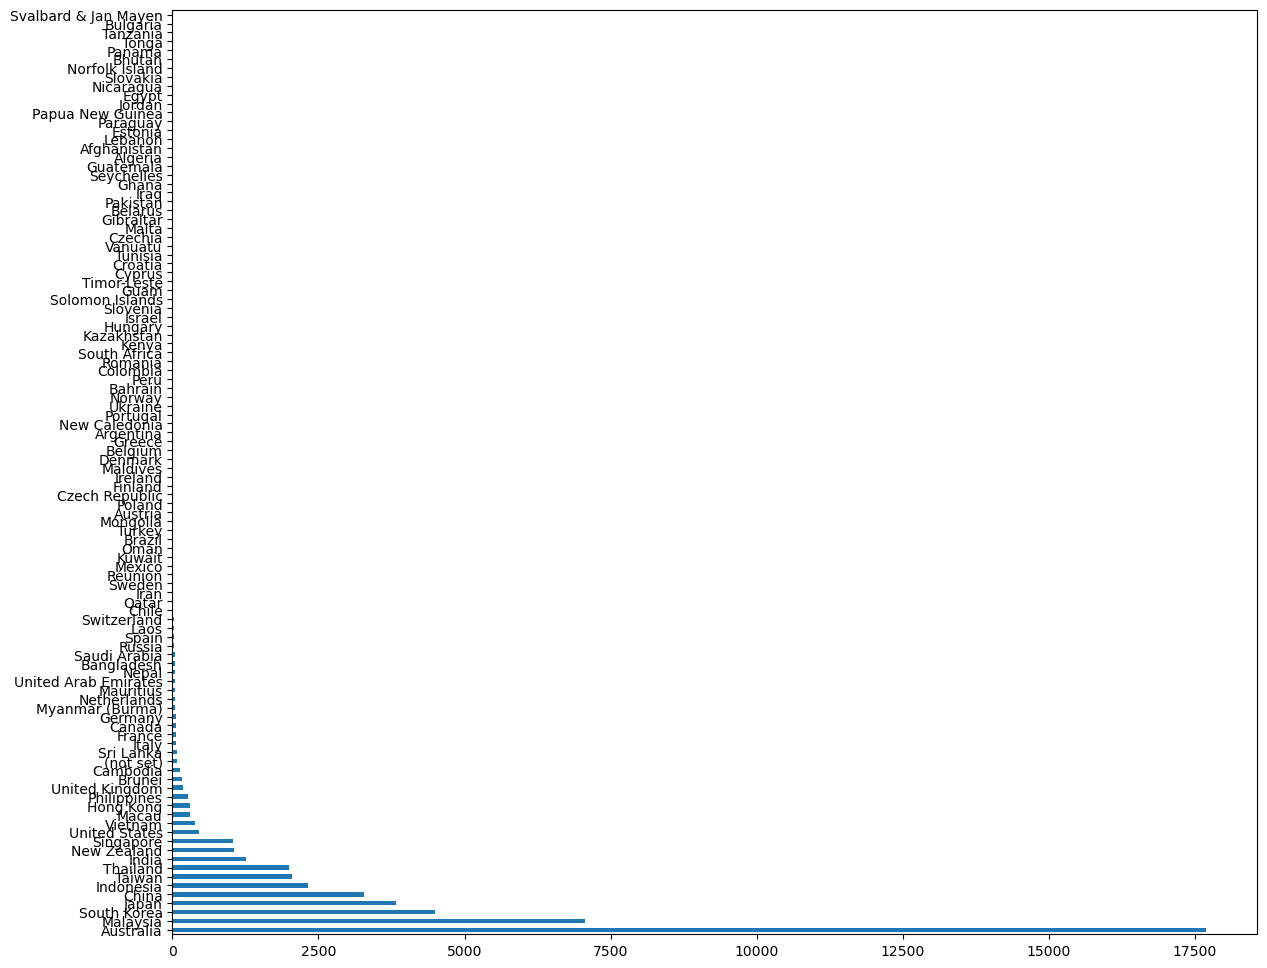

In [171]:
cat["booking_origin"].value_counts().plot(kind="barh", figsize=(14,12));

The variables "route" and "booking_origin" have many different categories with very low frequencies. When transforming the data for the machine learning model it is not ideal to have so many dimensions. 

Thus, we are going to create a function to group the "rare" categories under the name "OTHERS".

In [172]:
def group_cat_rare(variable, criterion = 0.005):
    #Compute the frequencies
    frequencies = variable.value_counts(normalize=True)
    #Identify categories less frequent than criterion
    temp = [x for x in frequencies.loc[frequencies < criterion].index.values]
    #Replace with "OTHERS" where the condition is satisfied
    temp2 = np.where(variable.isin(temp),"OTHERS",variable)

    return temp2

In [173]:
var_rare = ["route","booking_origin"]
for variable in var_rare:
    cat[variable] = group_cat_rare(cat[variable],criterion = 0.005)

In [174]:
cat["route"].value_counts()

OTHERS    25884
AKLKUL     2620
PENTPE      912
MELSGN      833
ICNSIN      793
DMKKIX      729
ICNSYD      683
DMKPER      677
DPSICN      658
DMKOOL      652
MELTPE      637
MELPEN      635
SGNSYD      610
DMKSYD      522
COKSYD      508
COKMEL      473
CMBMEL      456
HNDPEN      439
PENPER      433
JHBKTM      408
CGKICN      404
DPSPVG      390
CGKHND      381
HKTICN      372
PENSYD      366
PERSGN      355
DMKMEL      344
CTSDMK      340
HKTSYD      338
DPSKIX      337
COKPER      336
CGKKIX      332
ICNPER      331
HKTPER      324
CMBSYD      316
KTMPEN      312
PERTPE      311
DPSHND      310
ICNPEN      298
OOLSGN      295
ICNMEL      292
HNDSIN      284
KTMMFM      272
HKTOOL      271
DMKICN      270
DELMEL      265
KIXSIN      261
HYDSYD      259
HNDPER      257
DPSPEK      249
KCHPER      247
Name: route, dtype: int64

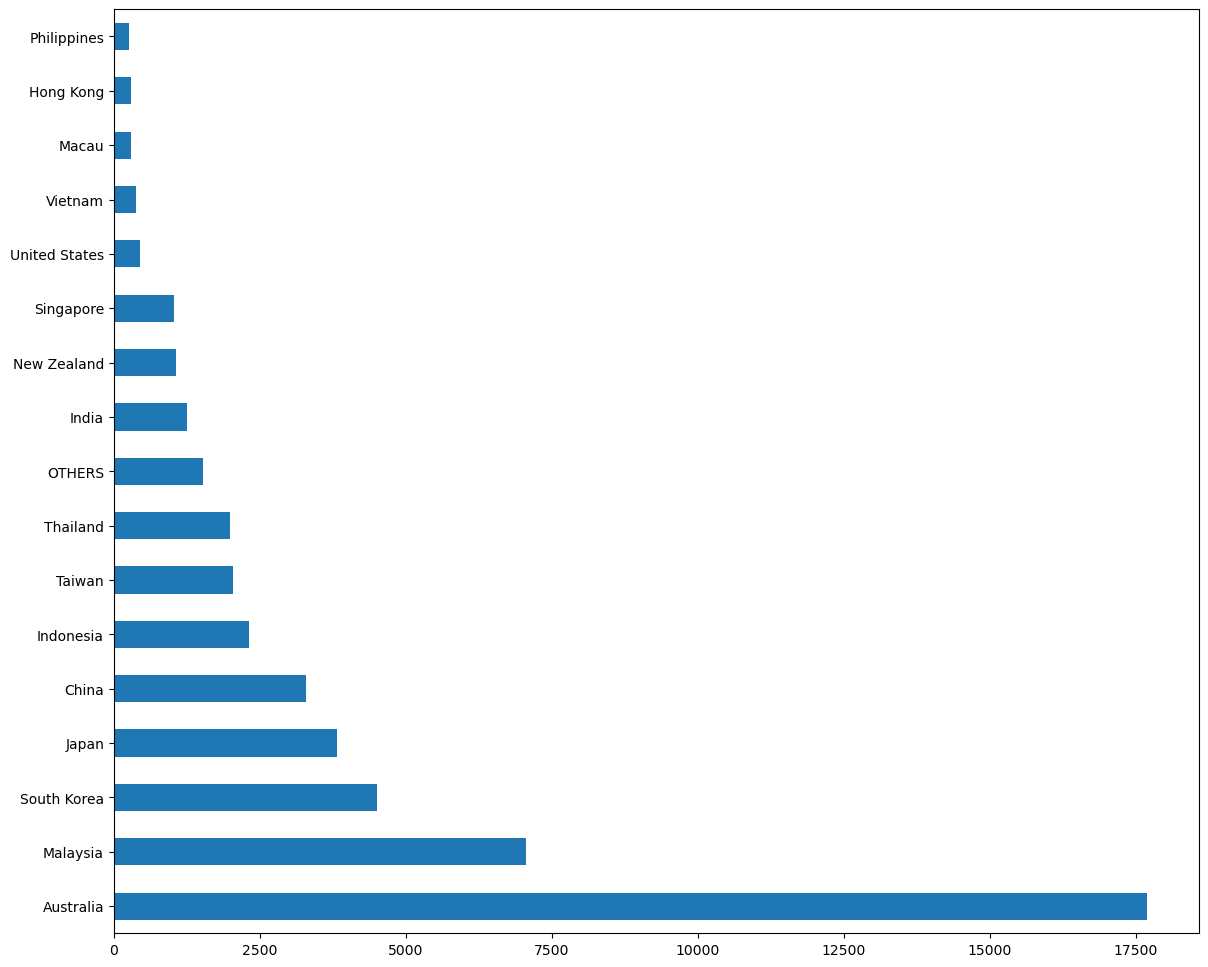

In [175]:
cat["booking_origin"].value_counts().plot(kind="barh", figsize=(14,12));

### Numerical outliers

In [176]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   purchase_lead          49281 non-null  int64  
 2   length_of_stay         49281 non-null  int64  
 3   flight_hour            49281 non-null  int64  
 4   wants_extra_baggage    49281 non-null  int64  
 5   wants_preferred_seat   49281 non-null  int64  
 6   wants_in_flight_meals  49281 non-null  int64  
 7   flight_duration        49281 non-null  float64
 8   booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 3.8 MB


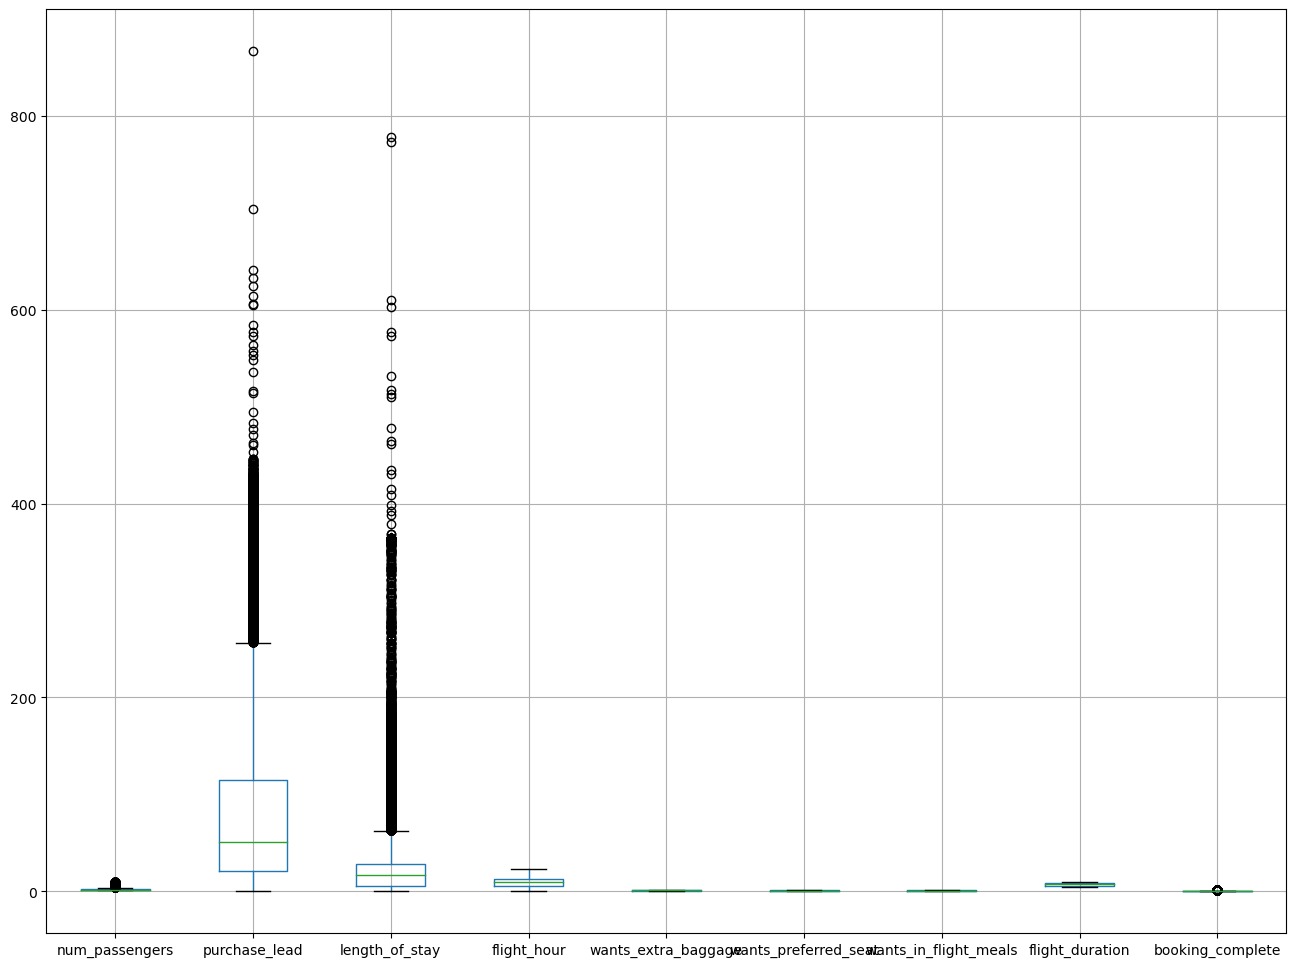

In [177]:
num.boxplot(figsize=(16,12));

Variables presenting the most outliers are purchase_lead and length_of_stay. Let's dive in a bit deeper.

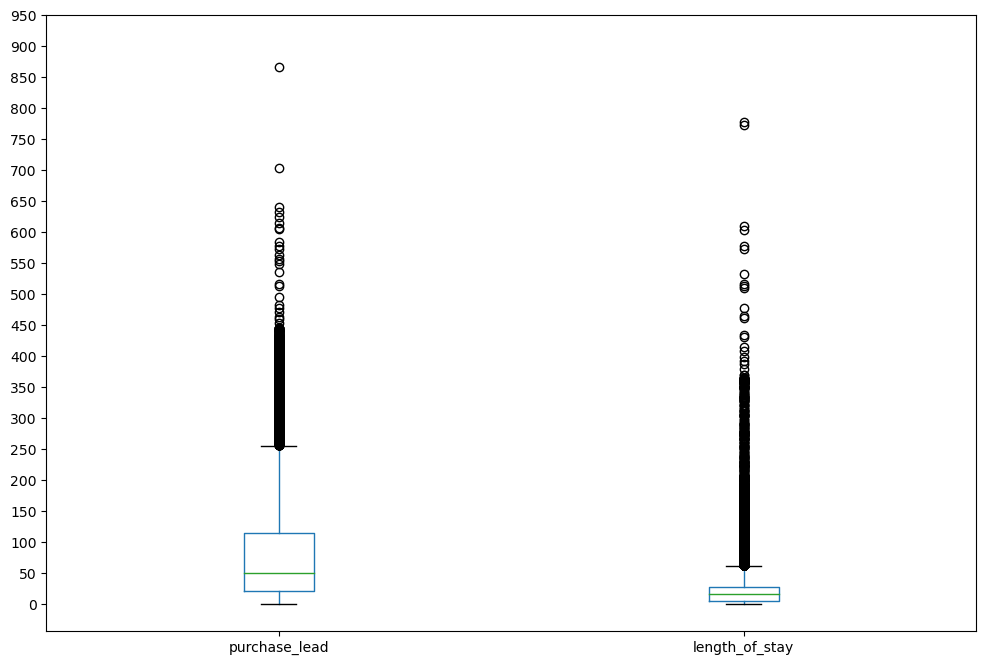

In [178]:
ax = num[["purchase_lead","length_of_stay"]].boxplot(figsize=(12,8));
plt.grid()
ax.set_yticks(range(0, 1000, 50));

Conclusions:

- purchase_lead presents most of the values in the range between 0 and 450 days. 
- length_of_stay presents most of the values in the range between 0 and 365 days. 
- We are going to manually clip all the maximum values for both variables.

Conclusions:
- purchase_lead presents most of the values in the range between 0 and 450 days. 
- length_of_stay presents most of the values in the range between 0 and 365 days. 
- We are going to automatically clip all the maximum values for purchase_lead and length_of_stay by defining maximum percentiles.

We could proceed with a manual clip but it's not clear what values should be set as the maximum ones.

In [182]:
var_clip = ["purchase_lead","length_of_stay"]
p_min = 0
p_max = 0.99

for variable in var_clip:
    num[variable].clip(lower = num[variable].quantile(p_min), 
                       upper = num[variable].quantile(p_max), 
                       inplace = True)

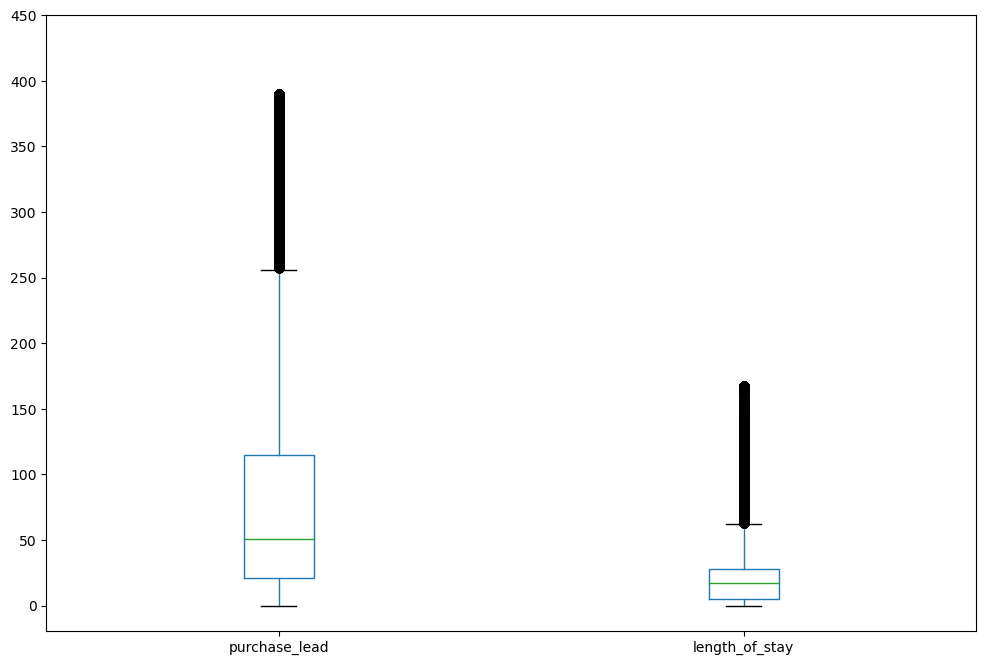

In [191]:
ax = num[["purchase_lead","length_of_stay"]].boxplot(figsize=(12,8));
plt.grid()
ax.set_yticks(range(0, 500, 50));

Save the data in .pickle format to proceed to the next step (EDA).

In [192]:
pd.to_pickle(cat, "cat_cleaning.pickle")
pd.to_pickle(num, "num_cleaning.pickle")